In [1]:
# Loading important Libraries.....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading libraries from SK-Learn.......
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Loading Ensemble Libraries...
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Loading Model selection libraries.....
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.....
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings....
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading both Training and Testing file separately....
df_flight_train=pd.read_excel("Flight_Data_Train.xlsx")
df_flight_test=pd.read_excel("Flight_Test_set.xlsx")

# Making a same column in both named dataset so thta at any point we can separate training and testing dataset....
df_flight_train["dataset"]="train"
df_flight_test["dataset"]="test"

In [3]:
# Concatenating the Training and Testing dataset....
df=pd.concat([df_flight_train,df_flight_test],ignore_index=True)
df

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,train
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,20:25 07 Jun,6/06/2019,20:30,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,1 stop,test
13350,No info,IndiGo,16:55,27/03/2019,14:20,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,non-stop,test
13351,No info,Jet Airways,04:25 07 Mar,6/03/2019,21:50,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,1 stop,test
13352,No info,Air India,19:15,6/03/2019,04:00,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,1 stop,test


## Understanding the Data               

1) Features/Attributes:                   
   >> Airline: The name of the airline.                
   >> Date_of_Journey: The date of the journey                   
   >> Source: The source from which the service begins.                
   >> Destination: The destination where the service ends.                     
   >> Route: The route taken by the flight to reach the destination.                 
   >> Dep_Time: The time when the journey starts from the source.              
   >> Arrival_Time: Time of arrival at the destination.                   
   >> Duration: Total duration of the flight.                 
   >> Total_Stops: Total stops between the source and destination.             
   >> Additional_Info: Additional information about the flight                  

2) Target:                 
   >>Price: The price of the ticket               
   
3) We have to predict the price of the Flight.             
4) Price Data is continuous thus i will use Regression Models for model training and evaluation.          

In [4]:
# As Converting Some object features into DateTime object type so that we can perform feature engineering....
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'] )
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset
0,No info,IndiGo,2020-03-22 01:10:00,2019-03-24,2020-04-30 22:20:00,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,train
1,No info,Air India,2020-04-30 13:15:00,2019-01-05,2020-04-30 05:50:00,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train
2,No info,Jet Airways,2020-06-10 04:25:00,2019-09-06,2020-04-30 09:25:00,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train
3,No info,IndiGo,2020-04-30 23:30:00,2019-12-05,2020-04-30 18:05:00,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train
4,No info,IndiGo,2020-04-30 21:35:00,2019-01-03,2020-04-30 16:50:00,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,2020-06-07 20:25:00,2019-06-06,2020-04-30 20:30:00,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,1 stop,test
13350,No info,IndiGo,2020-04-30 16:55:00,2019-03-27,2020-04-30 14:20:00,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,non-stop,test
13351,No info,Jet Airways,2020-03-07 04:25:00,2019-06-03,2020-04-30 21:50:00,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,1 stop,test
13352,No info,Air India,2020-04-30 19:15:00,2019-06-03,2020-04-30 04:00:00,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,1 stop,test


In [5]:
# Checking the shape of Dataset.
print('The Shape of Train dataset: ', df_flight_train.shape)
print('The Shape of Test dataset: ', df_flight_test.shape)
print('The Shape of overall dataset: ', df.shape)

The Shape of Train dataset:  (10683, 12)
The Shape of Test dataset:  (2671, 11)
The Shape of overall dataset:  (13354, 12)


In [6]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
df.head(10)

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset
0,No info,IndiGo,2020-03-22 01:10:00,2019-03-24,2020-04-30 22:20:00,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,train
1,No info,Air India,2020-04-30 13:15:00,2019-01-05,2020-04-30 05:50:00,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train
2,No info,Jet Airways,2020-06-10 04:25:00,2019-09-06,2020-04-30 09:25:00,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train
3,No info,IndiGo,2020-04-30 23:30:00,2019-12-05,2020-04-30 18:05:00,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train
4,No info,IndiGo,2020-04-30 21:35:00,2019-01-03,2020-04-30 16:50:00,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,train
5,No info,SpiceJet,2020-04-30 11:25:00,2019-06-24,2020-04-30 09:00:00,Banglore,2h 25m,3873.0,CCU → BLR,Kolkata,non-stop,train
6,In-flight meal not included,Jet Airways,2020-03-13 10:25:00,2019-12-03,2020-04-30 18:55:00,New Delhi,15h 30m,11087.0,BLR → BOM → DEL,Banglore,1 stop,train
7,No info,Jet Airways,2020-03-02 05:05:00,2019-01-03,2020-04-30 08:00:00,New Delhi,21h 5m,22270.0,BLR → BOM → DEL,Banglore,1 stop,train
8,In-flight meal not included,Jet Airways,2020-03-13 10:25:00,2019-12-03,2020-04-30 08:55:00,New Delhi,25h 30m,11087.0,BLR → BOM → DEL,Banglore,1 stop,train
9,No info,Multiple carriers,2020-04-30 19:15:00,2019-05-27,2020-04-30 11:25:00,Cochin,7h 50m,8625.0,DEL → BOM → COK,Delhi,1 stop,train


In [7]:
# Dropping duplicate entries...
df.drop_duplicates(inplace=True)
df
# duplicates entries deleted...

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset
0,No info,IndiGo,2020-03-22 01:10:00,2019-03-24,2020-04-30 22:20:00,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,train
1,No info,Air India,2020-04-30 13:15:00,2019-01-05,2020-04-30 05:50:00,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train
2,No info,Jet Airways,2020-06-10 04:25:00,2019-09-06,2020-04-30 09:25:00,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train
3,No info,IndiGo,2020-04-30 23:30:00,2019-12-05,2020-04-30 18:05:00,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train
4,No info,IndiGo,2020-04-30 21:35:00,2019-01-03,2020-04-30 16:50:00,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,2020-06-07 20:25:00,2019-06-06,2020-04-30 20:30:00,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,1 stop,test
13350,No info,IndiGo,2020-04-30 16:55:00,2019-03-27,2020-04-30 14:20:00,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,non-stop,test
13351,No info,Jet Airways,2020-03-07 04:25:00,2019-06-03,2020-04-30 21:50:00,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,1 stop,test
13352,No info,Air India,2020-04-30 19:15:00,2019-06-03,2020-04-30 04:00:00,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,1 stop,test


In [8]:
# Checking the null values....
df.isnull().sum()
# Neglecting The Price as these are only the values we need to predict...

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2645
Route                 1
Source                0
Total_Stops           1
dataset               0
dtype: int64

In [9]:
# Check null column values....
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head())

        Price            Route Total_Stops
9039   7480.0              NaN         NaN
10683     NaN  DEL → BOM → COK      1 stop
10684     NaN  CCU → MAA → BLR      1 stop
10685     NaN  DEL → BOM → COK      1 stop
10686     NaN  DEL → BOM → COK      1 stop


In [10]:
# checking the null values...
df.isnull().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2645
Route                 1
Source                0
Total_Stops           1
dataset               0
dtype: int64

In [11]:
# checking the Features information regarding the dataset....
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 13353
Data columns (total 12 columns):
Additional_Info    13108 non-null object
Airline            13108 non-null object
Arrival_Time       13108 non-null datetime64[ns]
Date_of_Journey    13108 non-null datetime64[ns]
Dep_Time           13108 non-null datetime64[ns]
Destination        13108 non-null object
Duration           13108 non-null object
Price              10463 non-null float64
Route              13107 non-null object
Source             13108 non-null object
Total_Stops        13107 non-null object
dataset            13108 non-null object
dtypes: datetime64[ns](3), float64(1), object(8)
memory usage: 1.3+ MB


Features Information:           
1) No null data.                
2) float datatype= 1        
3) object datatype= 8          
4) Datetime=3         

In [12]:
# Checking the no. of different unique values present in the each Feature of the Dataset......
for i in df.columns.values:
    print('Number of unique values in {} are {} '.format(i,df[i].nunique()))

Number of unique values in Additional_Info are 10 
Number of unique values in Airline are 12 
Number of unique values in Arrival_Time are 1451 
Number of unique values in Date_of_Journey are 40 
Number of unique values in Dep_Time are 223 
Number of unique values in Destination are 6 
Number of unique values in Duration are 374 
Number of unique values in Price are 1870 
Number of unique values in Route are 132 
Number of unique values in Source are 5 
Number of unique values in Total_Stops are 5 
Number of unique values in dataset are 2 


## Feature Engineering

In [13]:
# Now here I'm finding the travel duration difference between arrival and departure...  
x=(df["Arrival_Time"]-df["Dep_Time"])
duration_list=list()
for i in range(len(x)):
    dur=x.iloc[i].seconds/3600
    duration_list.append(dur)
df["Duration"]=duration_list

In [14]:
# Checking whether the values have changed in 'Duration' or not....
df

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset
0,No info,IndiGo,2020-03-22 01:10:00,2019-03-24,2020-04-30 22:20:00,New Delhi,2.833333,3897.0,BLR → DEL,Banglore,non-stop,train
1,No info,Air India,2020-04-30 13:15:00,2019-01-05,2020-04-30 05:50:00,Banglore,7.416667,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train
2,No info,Jet Airways,2020-06-10 04:25:00,2019-09-06,2020-04-30 09:25:00,Cochin,19.000000,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train
3,No info,IndiGo,2020-04-30 23:30:00,2019-12-05,2020-04-30 18:05:00,Banglore,5.416667,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train
4,No info,IndiGo,2020-04-30 21:35:00,2019-01-03,2020-04-30 16:50:00,New Delhi,4.750000,13302.0,BLR → NAG → DEL,Banglore,1 stop,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,2020-06-07 20:25:00,2019-06-06,2020-04-30 20:30:00,Banglore,23.916667,NaN,CCU → DEL → BLR,Kolkata,1 stop,test
13350,No info,IndiGo,2020-04-30 16:55:00,2019-03-27,2020-04-30 14:20:00,Banglore,2.583333,NaN,CCU → BLR,Kolkata,non-stop,test
13351,No info,Jet Airways,2020-03-07 04:25:00,2019-06-03,2020-04-30 21:50:00,Cochin,6.583333,NaN,DEL → BOM → COK,Delhi,1 stop,test
13352,No info,Air India,2020-04-30 19:15:00,2019-06-03,2020-04-30 04:00:00,Cochin,15.250000,NaN,DEL → BOM → COK,Delhi,1 stop,test


In [15]:
# Dropping the Arrival Time as we have already extracted information from it...
df.drop(columns=["Arrival_Time"],inplace=True)

In [16]:
# Using Simple Imputer to impute the NaN values from the most occured value...
from sklearn.impute import SimpleImputer
imp1=SimpleImputer(missing_values=np.nan,strategy='most_frequent' )
df['Total_Stops']=imp1.fit_transform(df['Total_Stops'].values.reshape(-1,1))
df['Route']=imp1.fit_transform(df['Route'].values.reshape(-1,1))

In [17]:
# checking the null values...
df.isnull().sum()

Additional_Info       0
Airline               0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2645
Route                 0
Source                0
Total_Stops           0
dataset               0
dtype: int64

In [18]:
#          Now We can split the different time given in slots like: Late Night, Early Morning, 
#        Morning, Afternoon, Evening, Night, thus by doing that we can train model more efficiently...
import numpy as np
df["time_of_day"]=np.where((df["Dep_Time"].dt.hour>=0)&(df["Dep_Time"].dt.hour<=2),"Late Night",
                  np.where((df["Dep_Time"].dt.hour>=3)&(df["Dep_Time"].dt.hour<=7),"Early Morning",
                  np.where((df["Dep_Time"].dt.hour>=8)&(df["Dep_Time"].dt.hour<=11),"Morning",
                  np.where((df["Dep_Time"].dt.hour>=12)&(df["Dep_Time"].dt.hour<=16),"Afternoon",
                  np.where((df["Dep_Time"].dt.hour>=17)&(df["Dep_Time"].dt.hour<=19),"Evening","Night")))))

In [19]:
# Checking the column 'time_of_day'...
df

,Additional_Info,Airline,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset,time_of_day
0,No info,IndiGo,2019-03-24,2020-04-30 22:20:00,New Delhi,2.833333,3897.0,BLR → DEL,Banglore,non-stop,train,Night
1,No info,Air India,2019-01-05,2020-04-30 05:50:00,Banglore,7.416667,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train,Early Morning
2,No info,Jet Airways,2019-09-06,2020-04-30 09:25:00,Cochin,19.000000,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train,Morning
3,No info,IndiGo,2019-12-05,2020-04-30 18:05:00,Banglore,5.416667,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train,Evening
4,No info,IndiGo,2019-01-03,2020-04-30 16:50:00,New Delhi,4.750000,13302.0,BLR → NAG → DEL,Banglore,1 stop,train,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,2019-06-06,2020-04-30 20:30:00,Banglore,23.916667,NaN,CCU → DEL → BLR,Kolkata,1 stop,test,Night
13350,No info,IndiGo,2019-03-27,2020-04-30 14:20:00,Banglore,2.583333,NaN,CCU → BLR,Kolkata,non-stop,test,Afternoon
13351,No info,Jet Airways,2019-06-03,2020-04-30 21:50:00,Cochin,6.583333,NaN,DEL → BOM → COK,Delhi,1 stop,test,Night
13352,No info,Air India,2019-06-03,2020-04-30 04:00:00,Cochin,15.250000,NaN,DEL → BOM → COK,Delhi,1 stop,test,Early Morning


In [20]:
# Replacing the Flight stops into numerical value and the changing the datatype from object to integer type...
df.replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],[1, 0, 2, 3, 4], inplace=True)
df["Total_Stops"] = df["Total_Stops"].astype(int)

In [21]:
# Checking whether the changes has occured or not...
df['Total_Stops'].value_counts()

1    7053
0    4321
2    1678
3      54
4       2
Name: Total_Stops, dtype: int64

In [22]:
#     Now from the Feature 'Date_of_Journey' creating new Features:"isWeekend", "Day_of_Week" , "Day_Of_Journey", 
#                   "Month_of_Journey"  which will tell  us whether the day is weekend or not,
#                              it will tell the month and the day name....
df["isWeekend"] = ((pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.dayofweek) // 5 == 1).astype(int)
df["Day_of_Week"] = pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.day_name()
df["Day_Of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.day
df["Month_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format = '%d/%m/%Y').dt.month

In [23]:
# Checking the changes...
df

,Additional_Info,Airline,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset,time_of_day,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey
0,No info,IndiGo,2019-03-24,2020-04-30 22:20:00,New Delhi,2.833333,3897.0,BLR → DEL,Banglore,0,train,Night,1,Sunday,24,3
1,No info,Air India,2019-01-05,2020-04-30 05:50:00,Banglore,7.416667,7662.0,CCU → IXR → BBI → BLR,Kolkata,2,train,Early Morning,1,Saturday,5,1
2,No info,Jet Airways,2019-09-06,2020-04-30 09:25:00,Cochin,19.000000,13882.0,DEL → LKO → BOM → COK,Delhi,2,train,Morning,0,Friday,6,9
3,No info,IndiGo,2019-12-05,2020-04-30 18:05:00,Banglore,5.416667,6218.0,CCU → NAG → BLR,Kolkata,1,train,Evening,0,Thursday,5,12
4,No info,IndiGo,2019-01-03,2020-04-30 16:50:00,New Delhi,4.750000,13302.0,BLR → NAG → DEL,Banglore,1,train,Afternoon,0,Thursday,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,2019-06-06,2020-04-30 20:30:00,Banglore,23.916667,NaN,CCU → DEL → BLR,Kolkata,1,test,Night,0,Thursday,6,6
13350,No info,IndiGo,2019-03-27,2020-04-30 14:20:00,Banglore,2.583333,NaN,CCU → BLR,Kolkata,0,test,Afternoon,0,Wednesday,27,3
13351,No info,Jet Airways,2019-06-03,2020-04-30 21:50:00,Cochin,6.583333,NaN,DEL → BOM → COK,Delhi,1,test,Night,0,Monday,3,6
13352,No info,Air India,2019-06-03,2020-04-30 04:00:00,Cochin,15.250000,NaN,DEL → BOM → COK,Delhi,1,test,Early Morning,0,Monday,3,6


In [24]:
#          Now in here I'm defining Different routes which will specify that at which location flight
#                    will travel and location where it will take layovers...
df['Route_1']=df['Route'].str.split('→ ').str[0]
df['Route_2']=df['Route'].str.split('→ ').str[1]
df['Route_3']=df['Route'].str.split('→ ').str[2]
df['Route_4']=df['Route'].str.split('→ ').str[3]
df['Route_5']=df['Route'].str.split('→ ').str[4]
df['Route_6']=df['Route'].str.split('→ ').str[5]
df

,Additional_Info,Airline,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,...,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,No info,IndiGo,2019-03-24,2020-04-30 22:20:00,New Delhi,2.833333,3897.0,BLR → DEL,Banglore,0,...,1,Sunday,24,3,BLR,DEL,NaN,NaN,NaN,NaN
1,No info,Air India,2019-01-05,2020-04-30 05:50:00,Banglore,7.416667,7662.0,CCU → IXR → BBI → BLR,Kolkata,2,...,1,Saturday,5,1,CCU,IXR,BBI,BLR,NaN,NaN
2,No info,Jet Airways,2019-09-06,2020-04-30 09:25:00,Cochin,19.000000,13882.0,DEL → LKO → BOM → COK,Delhi,2,...,0,Friday,6,9,DEL,LKO,BOM,COK,NaN,NaN
3,No info,IndiGo,2019-12-05,2020-04-30 18:05:00,Banglore,5.416667,6218.0,CCU → NAG → BLR,Kolkata,1,...,0,Thursday,5,12,CCU,NAG,BLR,NaN,NaN,NaN
4,No info,IndiGo,2019-01-03,2020-04-30 16:50:00,New Delhi,4.750000,13302.0,BLR → NAG → DEL,Banglore,1,...,0,Thursday,3,1,BLR,NAG,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,2019-06-06,2020-04-30 20:30:00,Banglore,23.916667,NaN,CCU → DEL → BLR,Kolkata,1,...,0,Thursday,6,6,CCU,DEL,BLR,NaN,NaN,NaN
13350,No info,IndiGo,2019-03-27,2020-04-30 14:20:00,Banglore,2.583333,NaN,CCU → BLR,Kolkata,0,...,0,Wednesday,27,3,CCU,BLR,NaN,NaN,NaN,NaN
13351,No info,Jet Airways,2019-06-03,2020-04-30 21:50:00,Cochin,6.583333,NaN,DEL → BOM → COK,Delhi,1,...,0,Monday,3,6,DEL,BOM,COK,NaN,NaN,NaN
13352,No info,Air India,2019-06-03,2020-04-30 04:00:00,Cochin,15.250000,NaN,DEL → BOM → COK,Delhi,1,...,0,Monday,3,6,DEL,BOM,COK,NaN,NaN,NaN


In [25]:
# Now filling up NaN values with None at those places where the flight won't go....
df['Route_1'].fillna("None",inplace=True)
df['Route_2'].fillna("None",inplace=True)
df['Route_3'].fillna("None",inplace=True)
df['Route_4'].fillna("None",inplace=True)
df['Route_5'].fillna("None",inplace=True)
df['Route_6'].fillna("None",inplace=True)

In [26]:
# Mean Encoding
#Airline
print("Mean Encoding of Airline",df.groupby('Airline')['Price'].mean())
#Source
print("Mean Encoding of Source",df.groupby('Source')['Price'].mean())
#Destination
print("Mean Encoding of Destination",df.groupby('Destination')['Price'].mean())
#Total_Stops
print("Mean Encoding of Total_Stops",df.groupby('Total_Stops')['Price'].mean())
#Additional_Info
print("Mean Encoding of Additional_Info",df.groupby('Additional_Info')['Price'].mean())
#isWeekend
print("Mean Encoding of isWeekend",df.groupby('isWeekend')['Price'].mean())

Mean Encoding of Airline Airline
Air Asia                              5590.260188
Air India                             9555.382891
GoAir                                 5861.056701
IndiGo                                5668.469897
Jet Airways                          11599.021081
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4335.841718
Trujet                                4140.000000
Vistara                               7801.355649
Vistara Premium economy               8962.333333
Name: Price, dtype: float64
Mean Encoding of Source Source
Banglore     8022.872877
Chennai      4789.892388
Delhi       10460.914634
Kolkata      9143.083566
Mumbai       5059.708752
Name: Price, dtype: float64
Mean Encoding of Destination Destination
Banglore      9143.083566
Cochin       10460.914634
Delhi         5143.918577
Hyderabad     5059.708752
Kolkata   

## Univariant Analysis

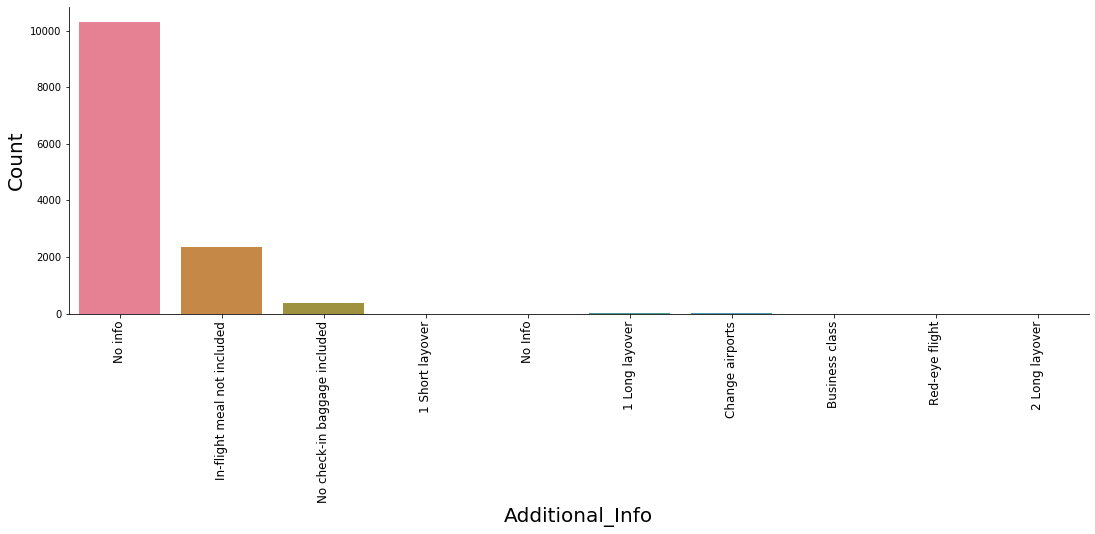

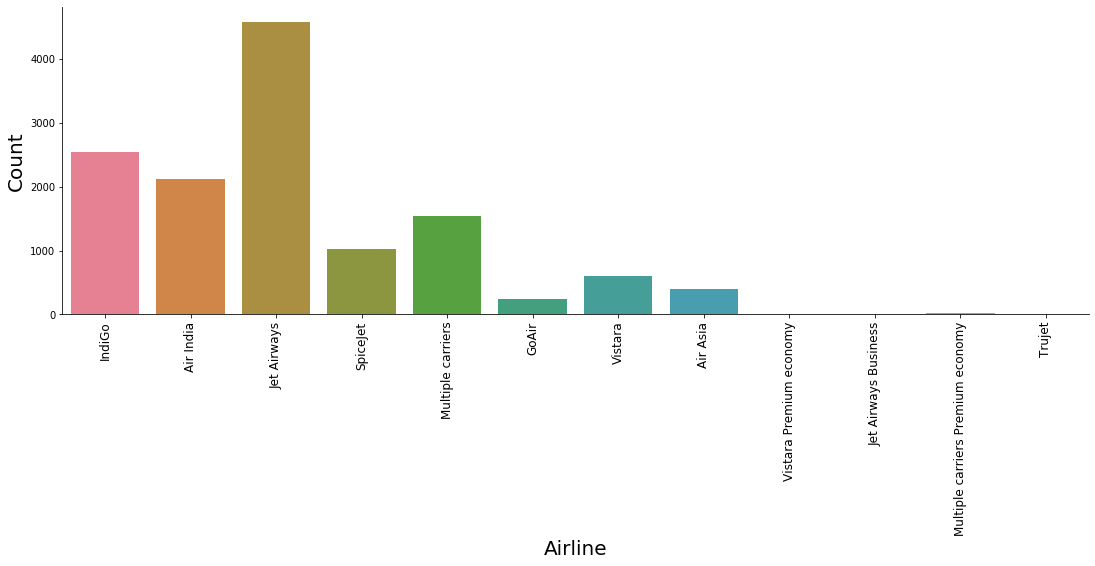

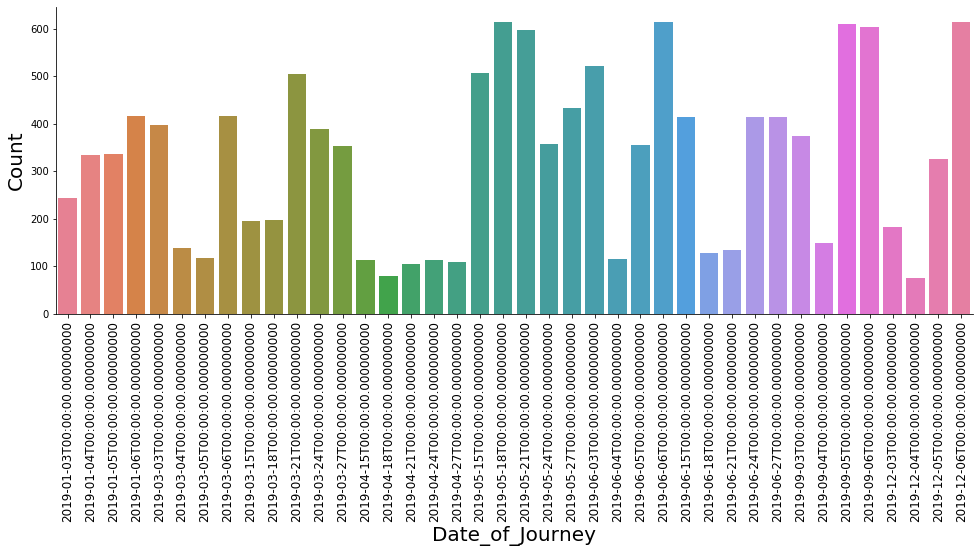

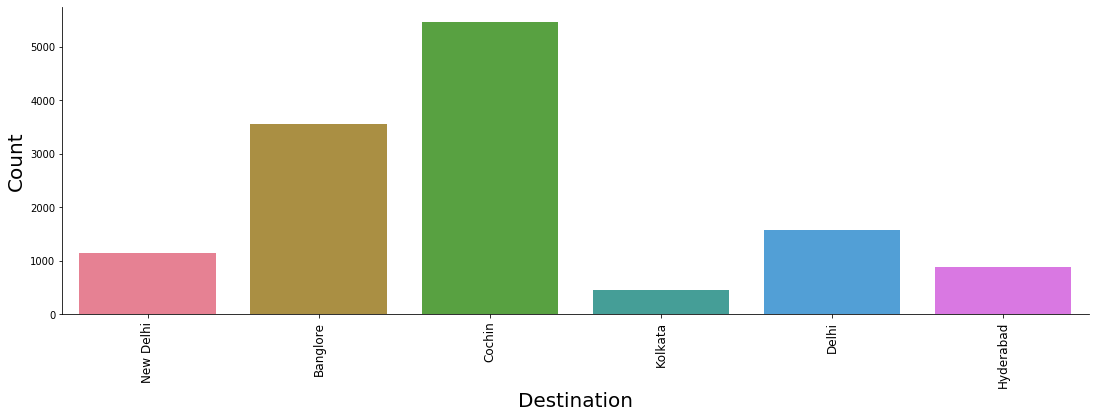

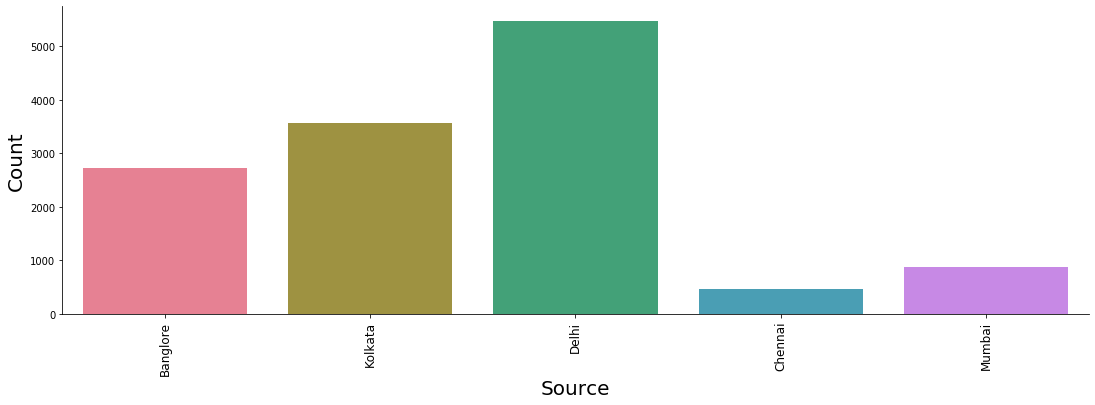

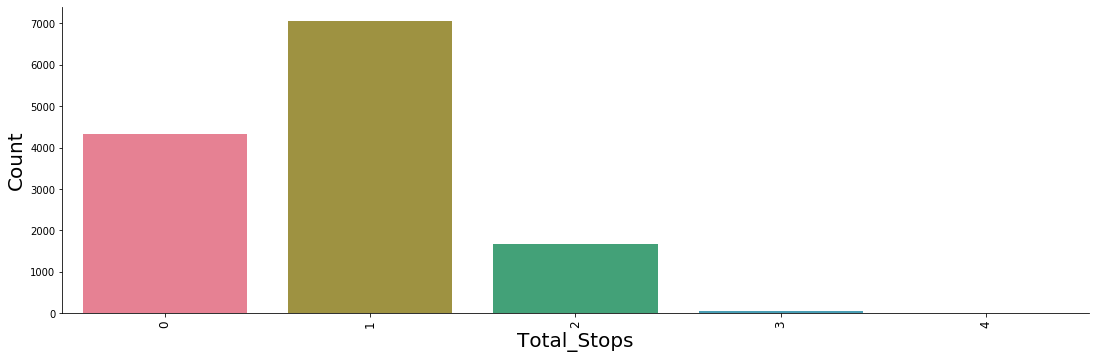

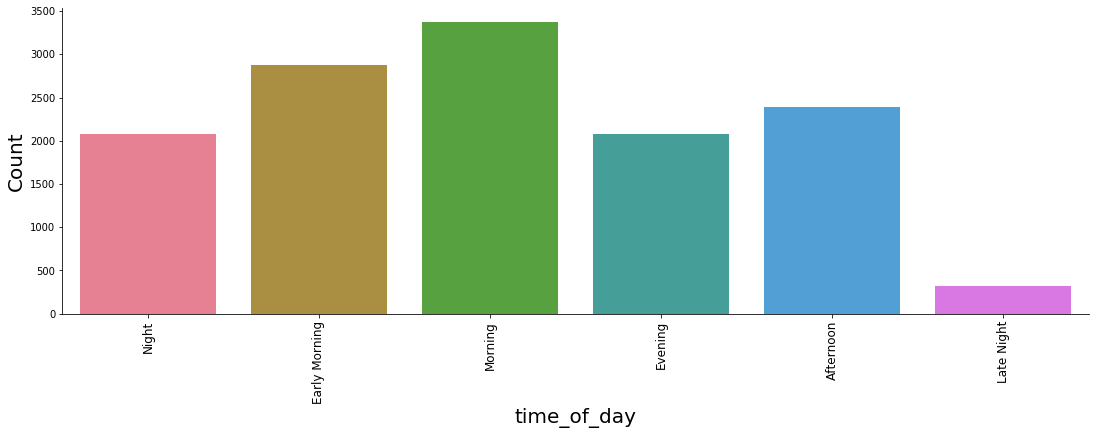

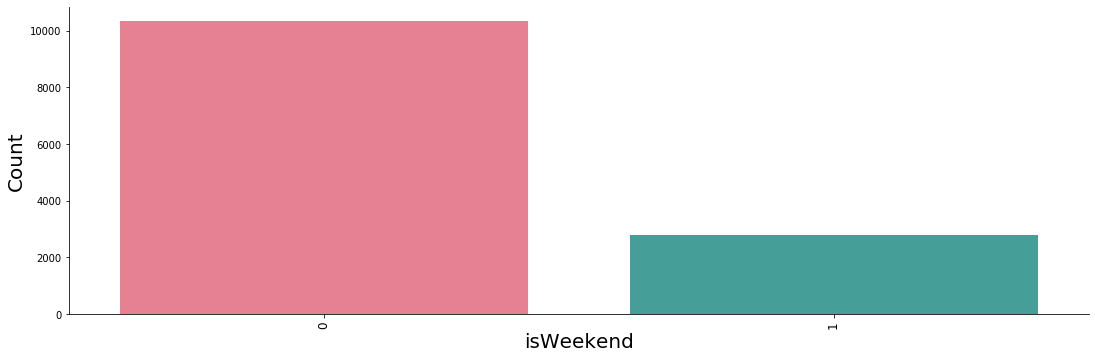

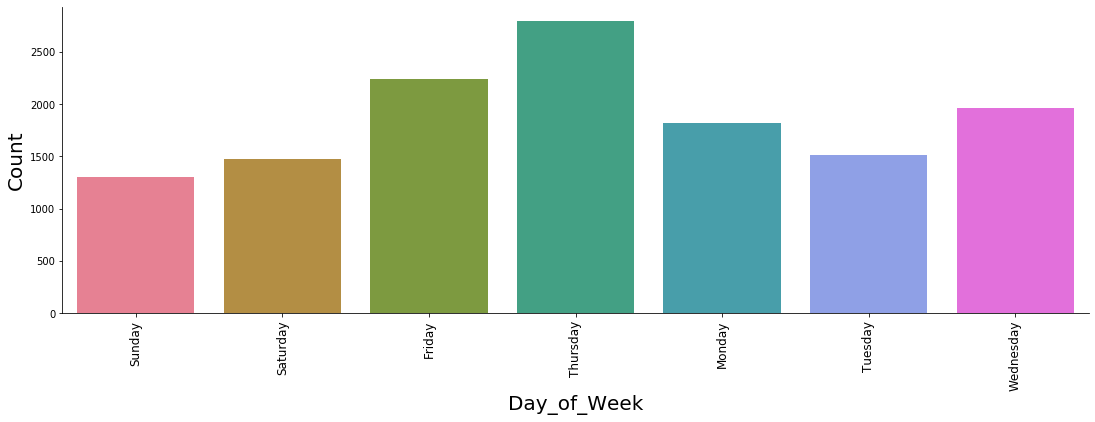

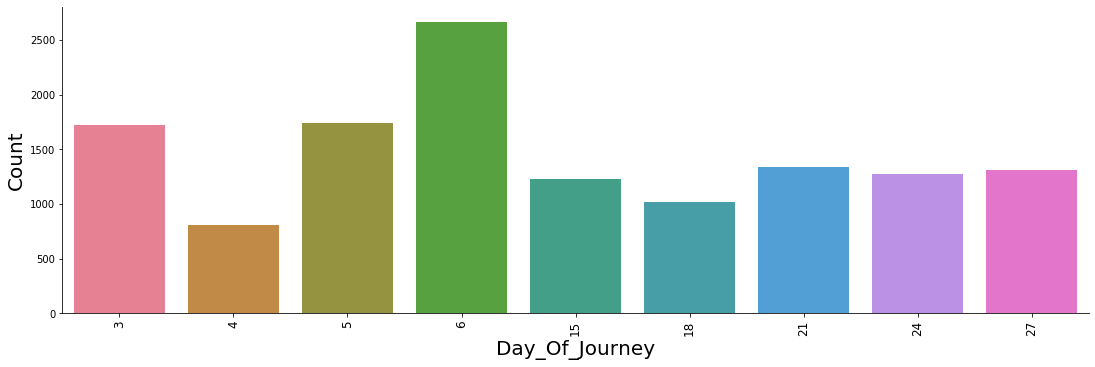

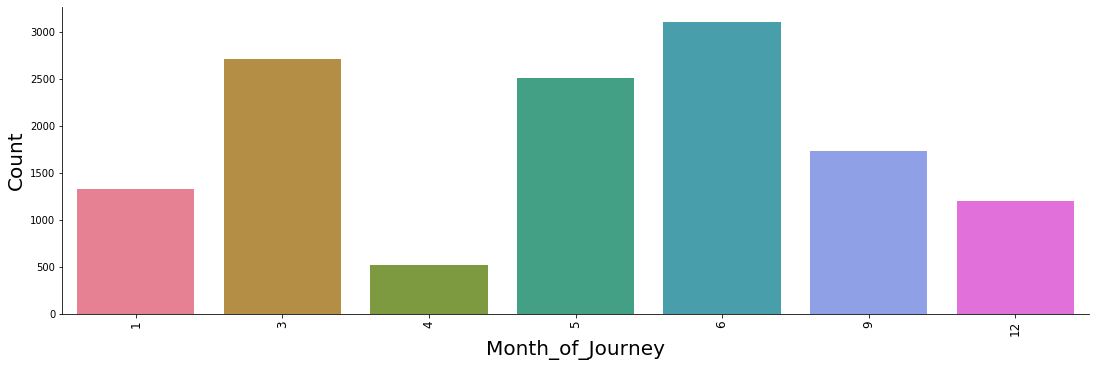

In [27]:
# For loop to plot counting Graph of Different Features.....
for i in df.drop(['Price','Dep_Time','Duration','Route','Route_1',
                  'Route_2','Route_3','Route_4','Route_5','Route_6','dataset'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,
                palette='husl')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the Graphs                  

1) Jet Airways are preferred over others by passengers for travelling.                
2) Maximum Journeys are taken place on 6th December,2019                 
3) Number of counts of Flights Where Destination is Cochin are more.               
4) Number of counts of Flights where source is Delhi is more.                   
5) Number of counts of Flights having only 1 stop are more.                
6) Most number of flights are during Morning slot.              
7) During Weekdays more number of flights runs.               
8) Thursday is the most busiest day for flights.                
9) Month May have maximum number of flight counts.                  

Text(0.5, 6.800000000000011, 'Route')

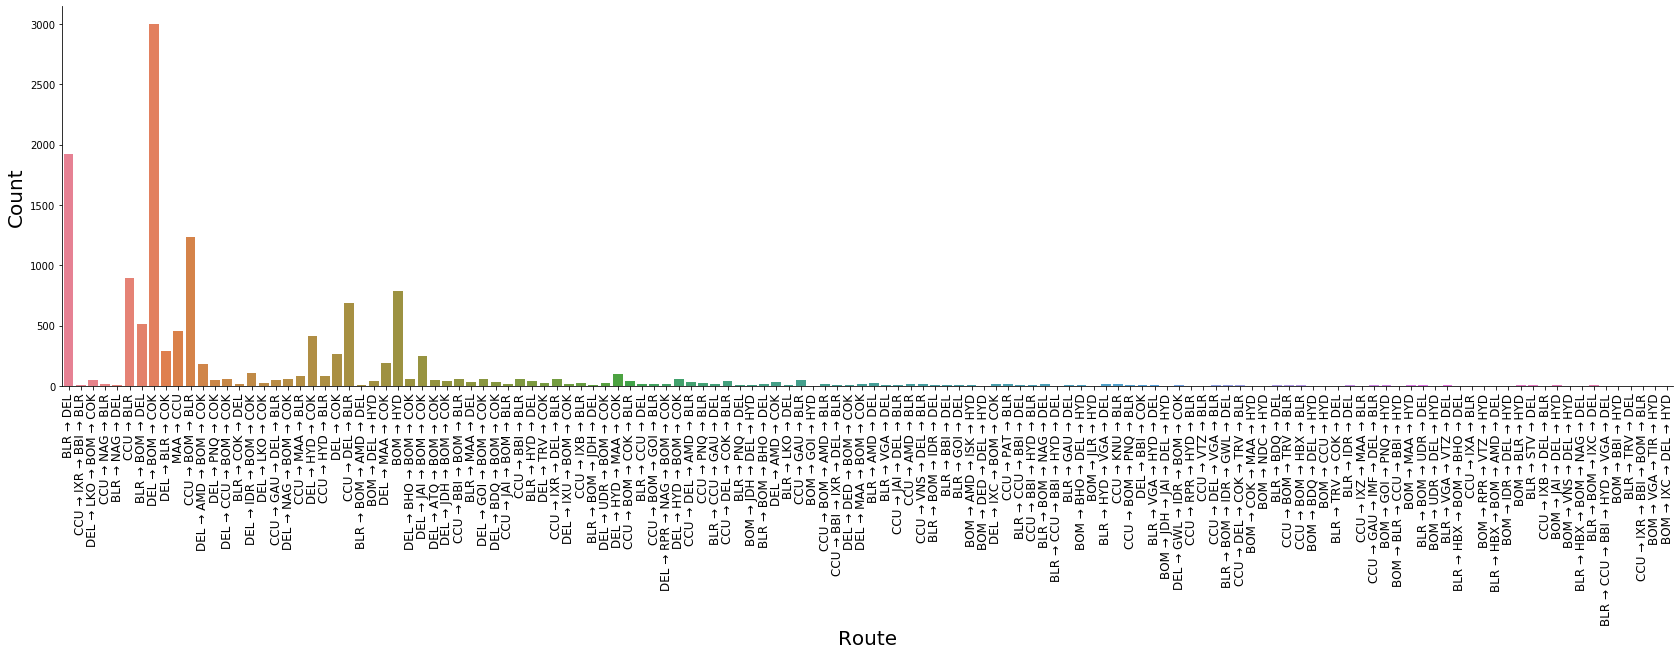

In [28]:
# Graph between Different flight routes count to find which flight have maximum run...
sns.catplot(x='Route',
                data=df,
                kind='count',
                height=6,
                aspect=4,
                palette='husl')
plt.xticks(rotation=90,fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Count',fontsize=20)
plt.xlabel('Route',fontsize=20)

#####  Information:               
1) Delhi to cochin via Bombay are more flights.                         
2) After that flights from Banglore to Delhi are more.         

# BIvariate Analysis

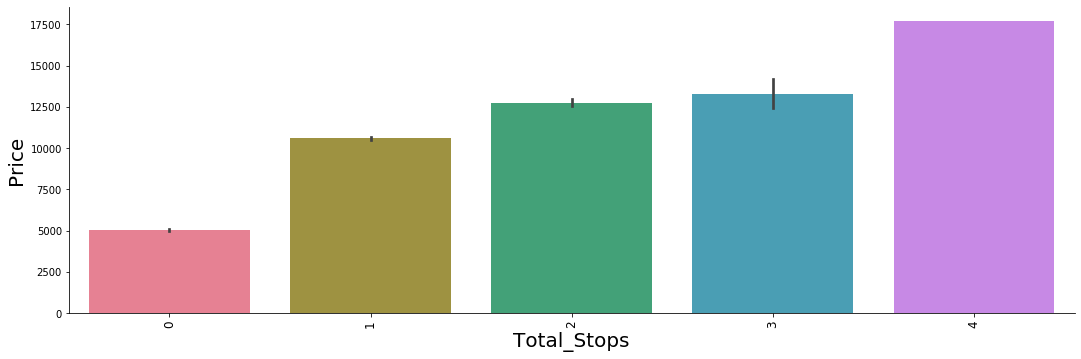

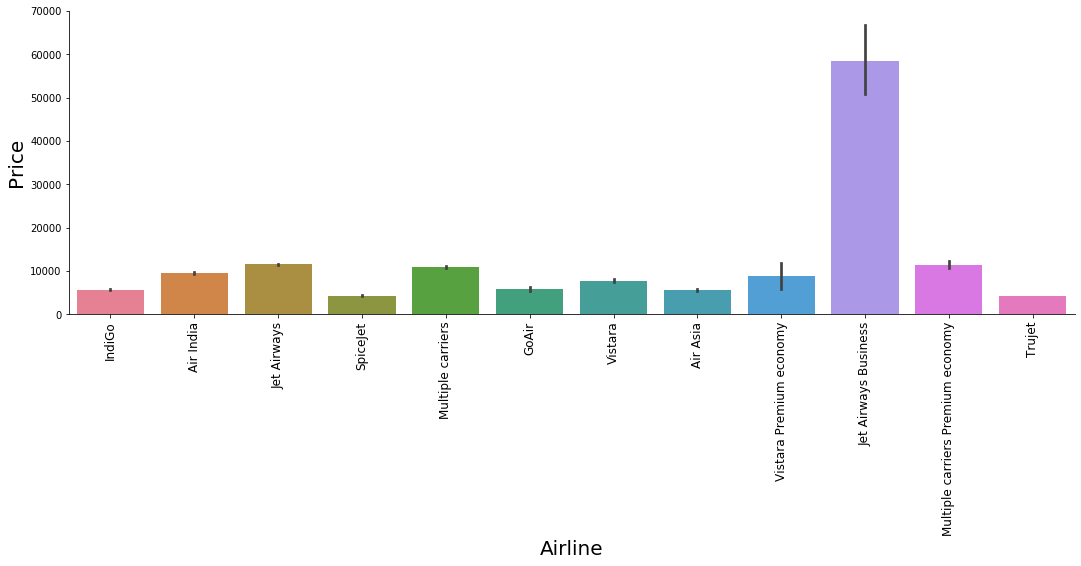

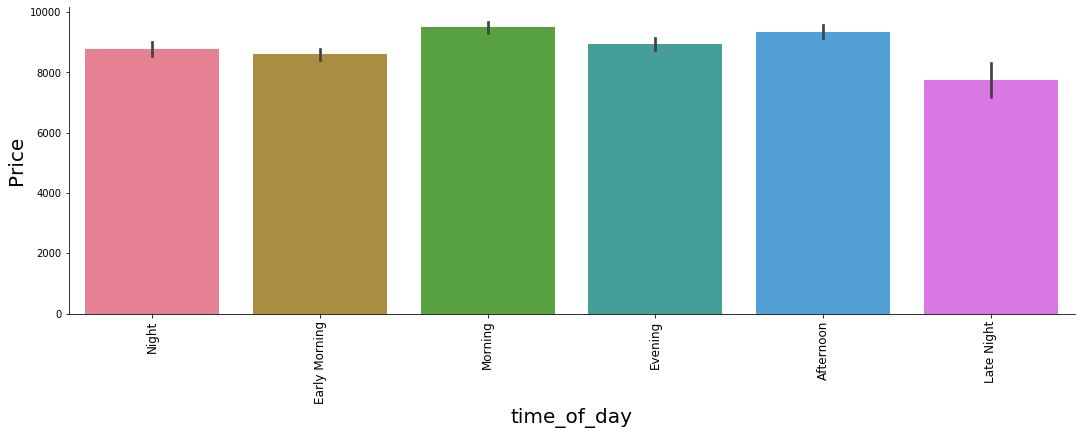

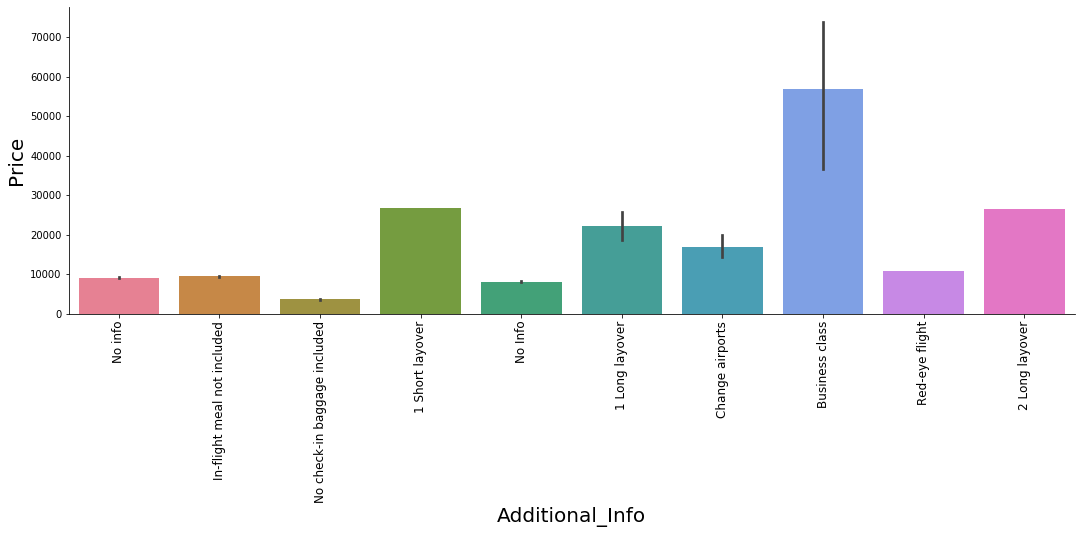

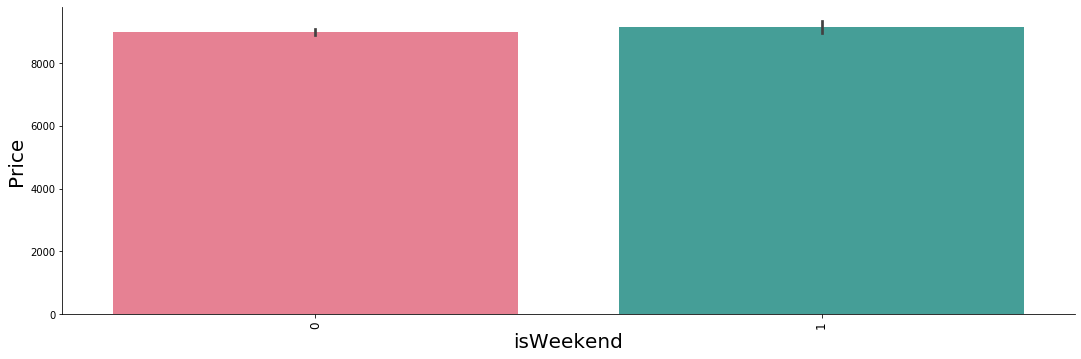

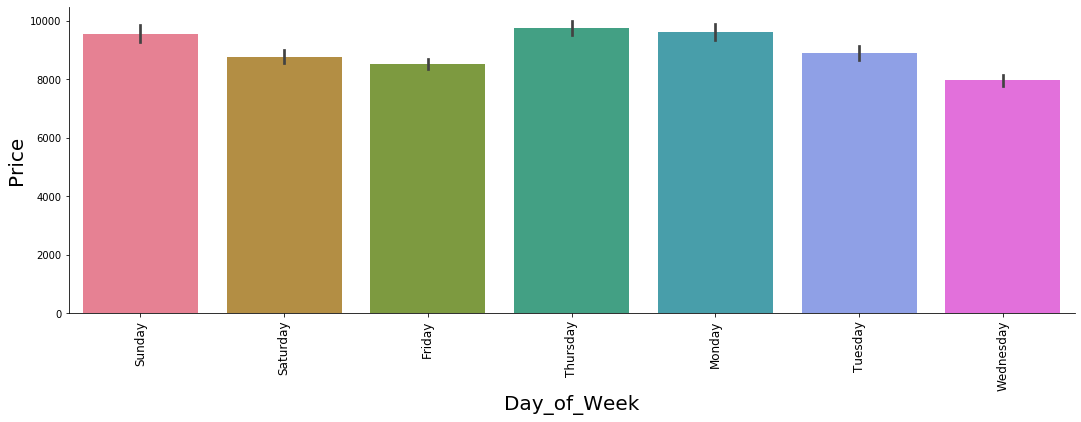

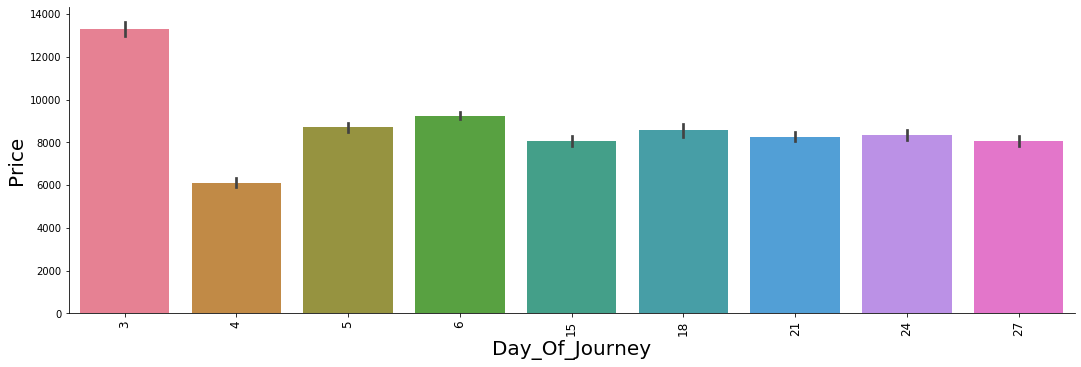

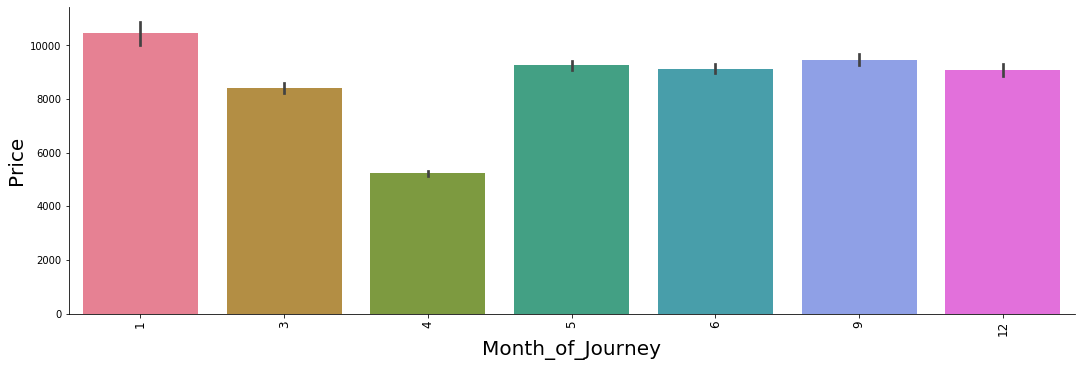

In [29]:
# for loop to plot graph between Flight Price and rest Features...
for i in ['Total_Stops','Airline','time_of_day','Additional_Info','isWeekend',
          'Day_of_Week','Day_Of_Journey','Month_of_Journey']:
    sns.catplot(x=i,
                data=df,
                y='Price',
                height=5,
                aspect=3,
                palette='husl',
               kind='bar')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Price',fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the Graph                                 

1) More the number of stops more is the flight price.               
2) Jet Airways Buisness have more number of flight price.                  
3) Morning flights have more price.             
4) Buisness class have more flight price.                     
5) Thursday and sunday have more flights thus price is also more.             
6) January month have costlier flights.                           

Text(0.5, 6.800000000000011, 'Routes')

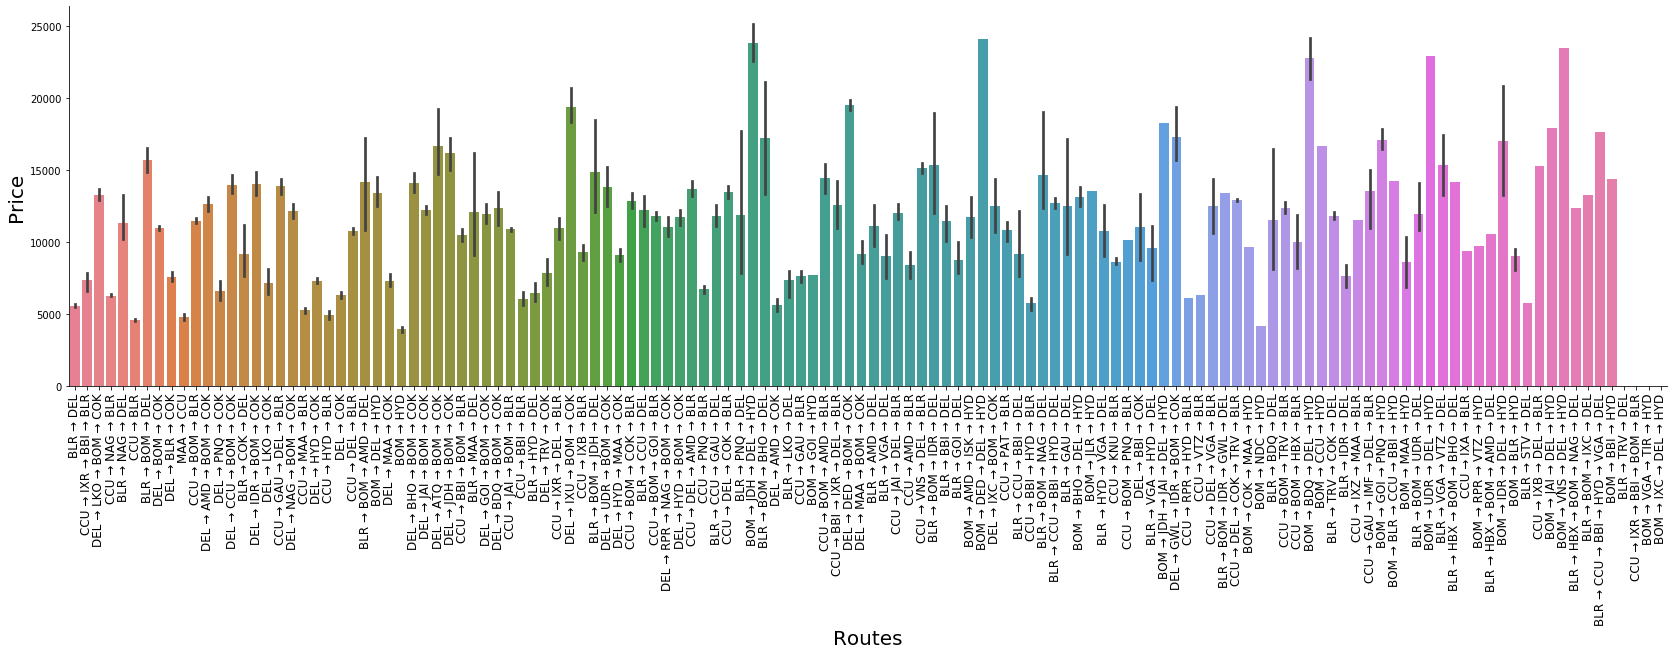

In [30]:
# Graph between Different flight routes and their prices....
sns.catplot(x='Route',
                data=df,
                y='Price',
                height=6,
                aspect=4,
                palette='husl',
           kind='bar')
plt.xticks(rotation=90,fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Routes',fontsize=20)

##### Information from the graph:                              

1) BOM-JDH-Del-HYD and BOM-DED-DEL-HYD have highest price.                   

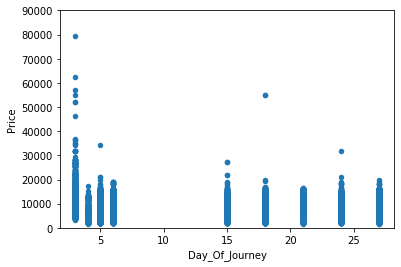

In [31]:
# scatter plot Day_Of_Journey/Price
var = 'Day_Of_Journey'
df.plot.scatter(x=var, y='Price', ylim=(0,90000));

##### Price is more in starting of the month.

Text(0.5, 0, 'Duration')

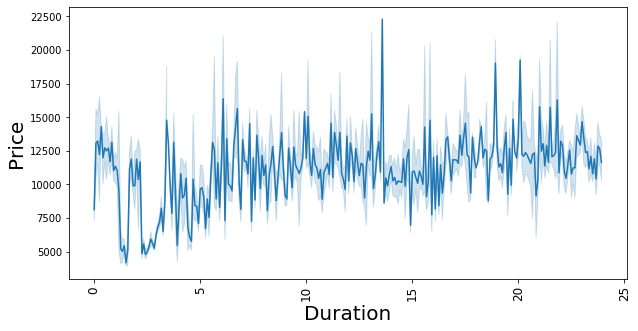

In [32]:
# Graph between Duration of flight and their price... 
plt.figure(figsize=(10,5))
sns.lineplot(x='Duration',
                data=df,
                y='Price',
                 )
plt.xticks(rotation=90,fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Duration',fontsize=20)

##### Information from the graph:                                        
1)  As Duration of the flight increases the price also increases            

In [33]:
# Now Dropping some Features in which we have done the feature engineering ...
df.drop(['Dep_Time','Route','Date_of_Journey'],axis=1,inplace=True)
df

,Additional_Info,Airline,Destination,Duration,Price,Source,Total_Stops,dataset,time_of_day,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,No info,IndiGo,New Delhi,2.833333,3897.0,Banglore,0,train,Night,1,Sunday,24,3,BLR,DEL,None,None,None,None
1,No info,Air India,Banglore,7.416667,7662.0,Kolkata,2,train,Early Morning,1,Saturday,5,1,CCU,IXR,BBI,BLR,None,None
2,No info,Jet Airways,Cochin,19.000000,13882.0,Delhi,2,train,Morning,0,Friday,6,9,DEL,LKO,BOM,COK,None,None
3,No info,IndiGo,Banglore,5.416667,6218.0,Kolkata,1,train,Evening,0,Thursday,5,12,CCU,NAG,BLR,None,None,None
4,No info,IndiGo,New Delhi,4.750000,13302.0,Banglore,1,train,Afternoon,0,Thursday,3,1,BLR,NAG,DEL,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,Banglore,23.916667,NaN,Kolkata,1,test,Night,0,Thursday,6,6,CCU,DEL,BLR,None,None,None
13350,No info,IndiGo,Banglore,2.583333,NaN,Kolkata,0,test,Afternoon,0,Wednesday,27,3,CCU,BLR,None,None,None,None
13351,No info,Jet Airways,Cochin,6.583333,NaN,Delhi,1,test,Night,0,Monday,3,6,DEL,BOM,COK,None,None,None
13352,No info,Air India,Cochin,15.250000,NaN,Delhi,1,test,Early Morning,0,Monday,3,6,DEL,BOM,COK,None,None,None


In [34]:
#Separate categorical and numberical columns
obj_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

In [35]:
# Using Label Encoder so that object data can be convert to binary data so that data can be evaluated
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
for val in obj_col.index.values:
    df[val]=le.fit_transform(df[val].astype(str))
df

,Additional_Info,Airline,Destination,Duration,Price,Source,Total_Stops,dataset,time_of_day,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,8,3,5,2.833333,3897.0,0,0,1,5,1,3,24,3,0,13,24,12,4,1
1,8,1,0,7.416667,7662.0,3,2,1,1,1,2,5,1,2,25,1,3,4,1
2,8,4,1,19.000000,13882.0,2,2,1,4,0,0,6,9,3,32,4,5,4,1
3,8,3,0,5.416667,6218.0,3,1,1,2,0,4,5,12,2,34,3,12,4,1
4,8,3,5,4.750000,13302.0,0,1,1,0,0,4,3,1,0,34,8,12,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,8,1,0,23.916667,NaN,3,1,0,5,0,4,6,6,2,14,3,12,4,1
13350,8,3,0,2.583333,NaN,3,0,0,0,0,6,27,3,2,5,24,12,4,1
13351,8,4,1,6.583333,NaN,2,1,0,5,0,1,3,6,3,7,6,12,4,1
13352,8,1,1,15.250000,NaN,2,1,0,1,0,1,3,6,3,7,6,12,4,1


In [36]:
# Checking Skewness....
df.skew()

Additional_Info     -1.798246
Airline              0.714589
Destination          1.232043
Duration             0.838010
Price                1.857641
Source              -0.420657
Total_Stops          0.331956
dataset             -1.486293
time_of_day          0.072085
isWeekend            1.408247
Day_of_Week         -0.062703
Day_Of_Journey       0.396915
Month_of_Journey     0.622507
Route_1             -0.598215
Route_2              1.482562
Route_3              0.569160
Route_4             -2.288971
Route_5            -16.536699
Route_6            -80.947512
dtype: float64

In [37]:
# Removing Skewness
for i in df.drop(['Price'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [38]:
# Checking the skewness again...
df.skew()

Additional_Info     -1.798246
Airline             -0.684009
Destination          0.277135
Duration            -0.018394
Price                1.857641
Source              -0.420657
Total_Stops          0.331956
dataset             -1.486293
time_of_day          0.072085
isWeekend            1.408247
Day_of_Week         -0.062703
Day_Of_Journey       0.396915
Month_of_Journey    -0.529898
Route_1             -0.598215
Route_2             -0.731614
Route_3              0.206558
Route_4             -2.288971
Route_5            -16.536699
Route_6            -80.947512
dtype: float64

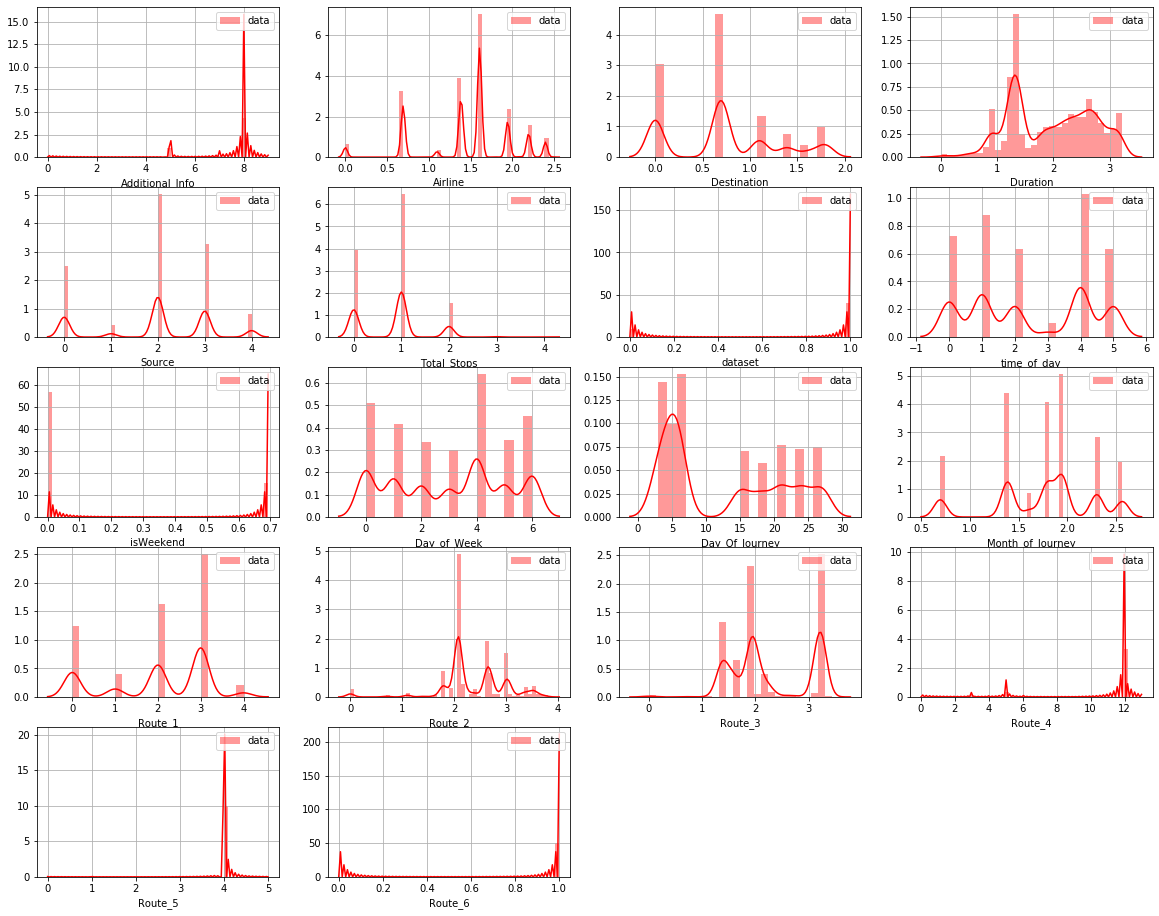

In [40]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.drop(['Price'],axis=1).columns.values)):
    plt.subplot(5,4,i+1)
    sns.distplot(df[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

In [41]:
# Checking the correlation
df.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,Additional_Info,Airline,Destination,Duration,Price,Source,Total_Stops,dataset,time_of_day,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
Additional_Info,1,-0.15,0.043,-0.13,-0.069,-0.022,-0.076,-0.023,-0.023,0.027,0.018,-0.021,0.0033,0.021,0.066,0.17,-0.056,-0.032,0.015
Airline,-0.15,1,0.036,-0.021,0.035,-0.013,-0.17,-0.004,0.035,-0.0086,-0.00077,0.025,0.0035,0.058,-0.023,-0.0053,0.28,0.064,0.018
Destination,0.043,0.036,1,-0.25,-0.096,-0.62,-0.29,0.00017,0.0027,-0.025,0.014,-0.011,-0.094,-0.4,0.17,0.51,0.11,0.02,-0.023
Duration,-0.13,-0.021,-0.25,1,0.48,0.062,0.62,-0.012,0.013,-0.0068,-0.0054,-0.037,0.053,0.33,-0.13,-0.63,-0.24,-0.02,-0.0072
Price,-0.069,0.035,-0.096,0.48,1,0.014,0.6,nan,0.0091,0.013,-0.025,-0.17,-0.018,0.17,-0.15,-0.54,-0.3,-0.055,-0.018
Source,-0.022,-0.013,-0.62,0.062,0.014,1,0.19,-0.0034,-0.041,0.0055,-0.037,0.0014,0.058,0.44,-0.019,-0.32,-0.078,-0.014,0.02
Total_Stops,-0.076,-0.17,-0.29,0.62,0.6,0.19,1,-0.014,-0.062,-0.018,-0.017,-0.037,0.062,0.42,-0.038,-0.75,-0.71,-0.2,-0.06
dataset,-0.023,-0.004,0.00017,-0.012,nan,-0.0034,-0.014,1,0.002,-0.0078,0.0064,0.028,-0.0064,0.0028,-0.0027,0.011,0.013,0.002,0.0092
time_of_day,-0.023,0.035,0.0027,0.013,0.0091,-0.041,-0.062,0.002,1,-0.011,-0.0079,-0.017,0.013,-0.076,-0.0082,0.021,0.062,0.017,0.0098
isWeekend,0.027,-0.0086,-0.025,-0.0068,0.013,0.0055,-0.018,-0.0078,-0.011,1,-0.13,0.05,-0.39,0.017,0.0081,0.0033,-0.0011,-0.0022,0.0064


(19.0, 0.0)

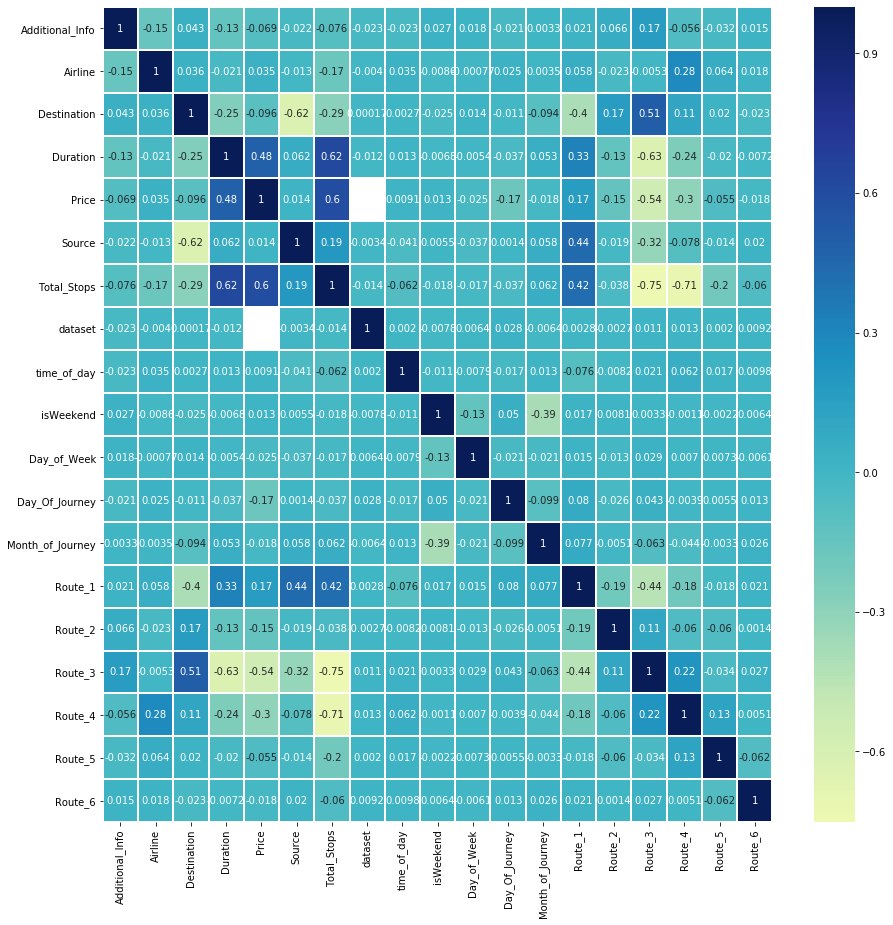

In [42]:
# Plotting Heatmap for correlation
fig, ax =plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

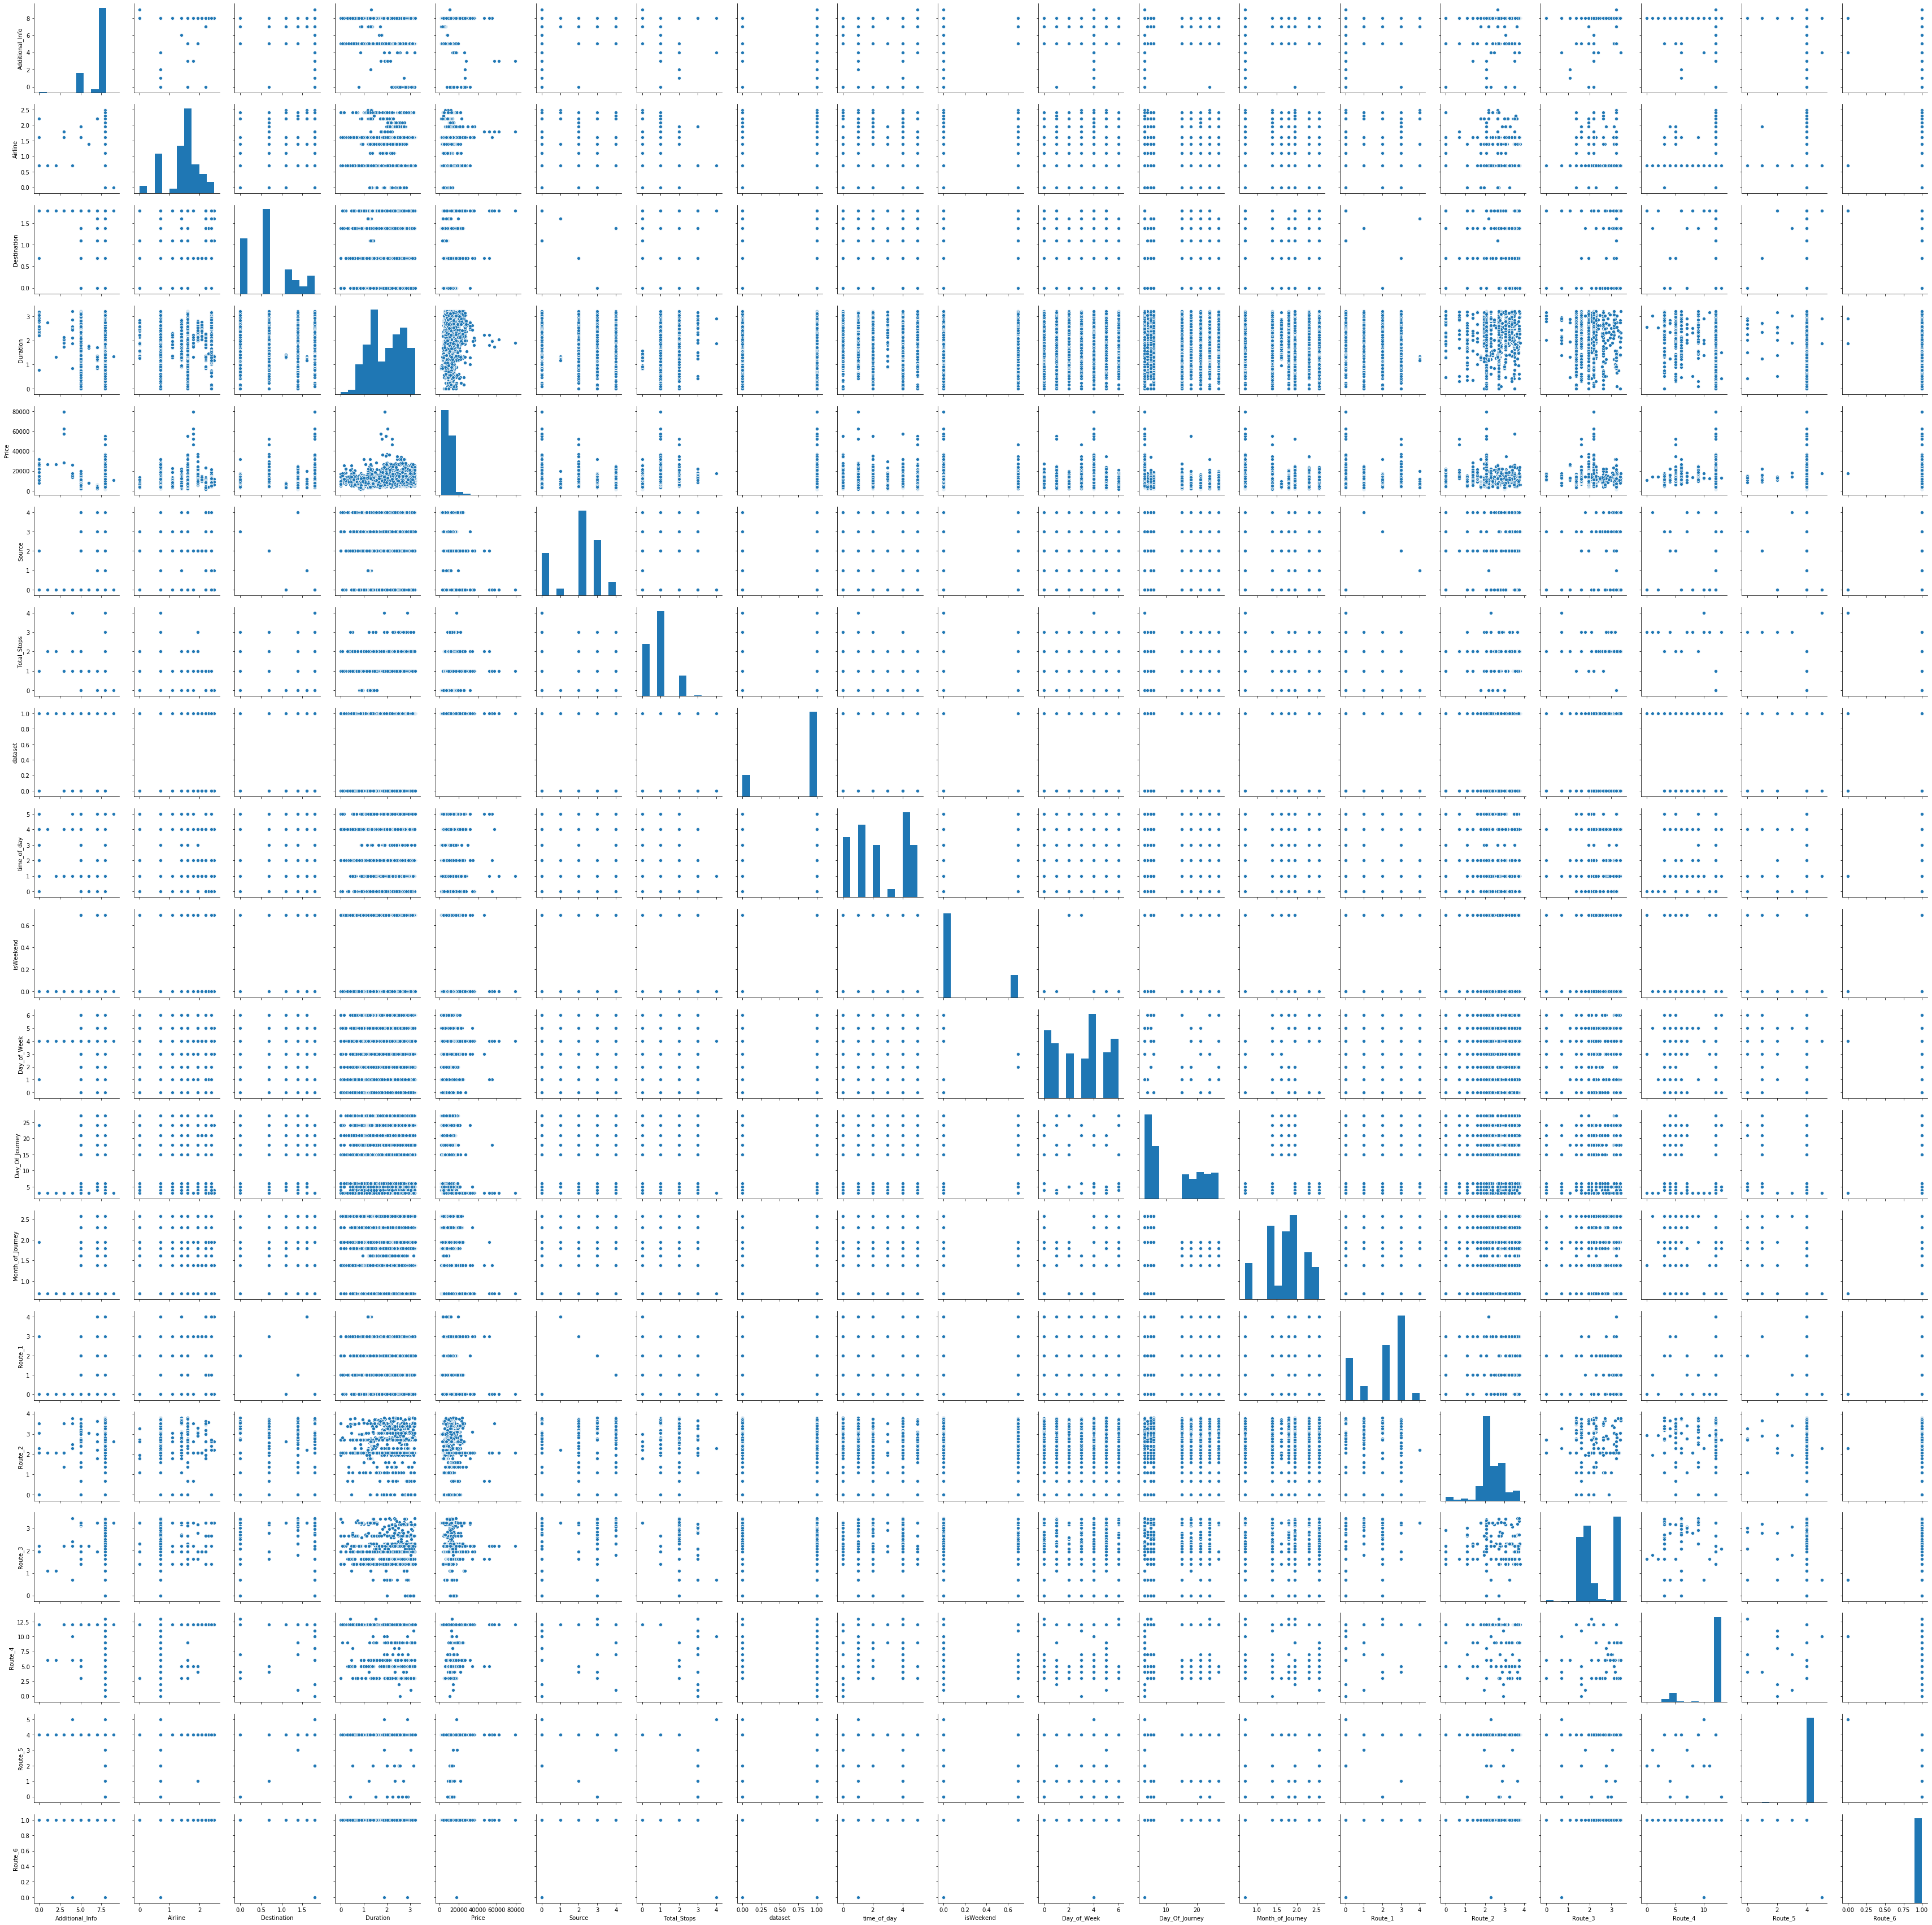

In [43]:
# Plotting Pairplot...
sns.pairplot(df)

In [44]:
# Lets seprate the train and test from df ( here dataset= 1 for train) and (dataset=0) for test sets...
df_train=df.loc[df["dataset"]==1]
df_test=df.loc[df["dataset"]==0]

In [45]:
# checking the train dataset...
df_train

,Additional_Info,Airline,Destination,Duration,Price,Source,Total_Stops,dataset,time_of_day,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,8,1.386294,1.791759,1.343735,3897.0,0,0,1,5,0.693147,3,24,1.386294,0,2.639057,3.218876,12,4,1
1,8,0.693147,0.000000,2.130214,7662.0,3,2,1,1,0.693147,2,5,0.693147,2,3.258097,0.693147,3,4,1
2,8,1.609438,0.693147,2.995732,13882.0,2,2,1,4,0.000000,0,6,2.302585,3,3.496508,1.609438,5,4,1
3,8,1.386294,0.000000,1.858899,6218.0,3,1,1,2,0.000000,4,5,2.564949,2,3.555348,1.386294,12,4,1
4,8,1.386294,1.791759,1.749200,13302.0,0,1,1,0,0.000000,4,3,0.693147,0,3.555348,2.197225,12,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,8,0.000000,0.000000,1.252763,4107.0,3,0,1,2,0.000000,6,4,2.302585,2,1.791759,3.218876,12,4,1
10679,8,0.693147,0.000000,1.276293,4145.0,3,0,1,5,0.693147,2,27,1.609438,2,1.791759,3.218876,12,4,1
10680,8,1.609438,1.098612,1.386294,7229.0,0,0,1,4,0.693147,2,27,1.609438,0,2.639057,3.218876,12,4,1
10681,8,2.397895,1.791759,1.299283,12648.0,0,0,1,4,0.000000,4,3,0.693147,0,2.639057,3.218876,12,4,1


In [46]:
# checking the test dataset...
df_test

,Additional_Info,Airline,Destination,Duration,Price,Source,Total_Stops,dataset,time_of_day,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
10683,8,1.609438,0.693147,2.477938,NaN,2,1,0,2,0.000000,4,6,1.945910,3,2.079442,1.945910,12,4,1
10684,8,1.386294,0.000000,1.609438,NaN,3,1,0,1,0.000000,4,5,2.564949,2,3.526361,1.386294,12,4,1
10685,5,1.609438,0.693147,3.208825,NaN,2,1,0,2,0.000000,5,21,1.791759,3,2.079442,1.945910,12,4,1
10686,8,1.945910,0.693147,2.639057,NaN,2,1,0,4,0.000000,5,21,1.791759,3,2.079442,1.945910,12,4,1
10687,8,0.000000,1.098612,1.343735,NaN,0,0,0,5,0.000000,1,24,1.945910,0,2.639057,3.218876,12,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,8,0.693147,0.000000,3.215537,NaN,3,1,0,5,0.000000,4,6,1.945910,2,2.708050,1.386294,12,4,1
13350,8,1.386294,0.000000,1.276293,NaN,3,0,0,0,0.000000,6,27,1.386294,2,1.791759,3.218876,12,4,1
13351,8,1.609438,0.693147,2.025953,NaN,2,1,0,5,0.000000,1,3,1.945910,3,2.079442,1.945910,12,4,1
13352,8,0.693147,0.693147,2.788093,NaN,2,1,0,1,0.000000,1,3,1.945910,3,2.079442,1.945910,12,4,1


In [47]:
# Re indexing the test dataset
df_test.reset_index(drop=True,inplace=True)

In [48]:
# Lets drop "Price" and "dataset" columns from the test dataset
# Also droping "dataset" columns from the train dataset
df_test.drop(columns=["Price","dataset"],inplace=True)
df_train.drop(columns=["dataset"],inplace=True)

In [49]:
# lets divide the df_train into input and output
X = df_train.drop("Price", axis=1)
y = df_train["Price"]

In [50]:
# checking train set..
X

,Additional_Info,Airline,Destination,Duration,Source,Total_Stops,time_of_day,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,8,1.386294,1.791759,1.343735,0,0,5,0.693147,3,24,1.386294,0,2.639057,3.218876,12,4,1
1,8,0.693147,0.000000,2.130214,3,2,1,0.693147,2,5,0.693147,2,3.258097,0.693147,3,4,1
2,8,1.609438,0.693147,2.995732,2,2,4,0.000000,0,6,2.302585,3,3.496508,1.609438,5,4,1
3,8,1.386294,0.000000,1.858899,3,1,2,0.000000,4,5,2.564949,2,3.555348,1.386294,12,4,1
4,8,1.386294,1.791759,1.749200,0,1,0,0.000000,4,3,0.693147,0,3.555348,2.197225,12,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,8,0.000000,0.000000,1.252763,3,0,2,0.000000,6,4,2.302585,2,1.791759,3.218876,12,4,1
10679,8,0.693147,0.000000,1.276293,3,0,5,0.693147,2,27,1.609438,2,1.791759,3.218876,12,4,1
10680,8,1.609438,1.098612,1.386294,0,0,4,0.693147,2,27,1.609438,0,2.639057,3.218876,12,4,1
10681,8,2.397895,1.791759,1.299283,0,0,4,0.000000,4,3,0.693147,0,2.639057,3.218876,12,4,1


In [51]:
#checking shape of input variable
X.shape

(10463, 17)

In [52]:
#checking shape of output variable
y.shape

(10463,)

In [53]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,Additional_Info,Airline,Destination,Duration,Source,Total_Stops,time_of_day,isWeekend,Day_of_Week,Day_Of_Journey,Month_of_Journey,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,0.497933,-0.176870,1.886044,-0.842806,-1.646960,-1.214674,1.431645,1.936345,0.000372,1.293425,-0.751754,-1.659037,0.429124,1.281114,0.380448,0.061618,0.009777
1,0.497933,-1.482958,-1.291373,0.241088,0.882096,1.813113,-0.797998,1.936345,-0.485508,-0.867849,-2.136482,-0.004191,1.431825,-2.152208,-3.244525,0.061618,0.009777
2,0.497933,0.243596,-0.062181,1.433910,0.039077,1.813113,0.874234,-0.516437,-1.457266,-0.754098,1.078757,0.823232,1.817995,-0.906658,-2.438976,0.061618,0.009777
3,0.497933,-0.176870,-1.291373,-0.132828,0.882096,0.299219,-0.240588,-0.516437,0.486251,-0.867849,1.602893,-0.004191,1.913303,-1.209985,0.380448,0.061618,0.009777
4,0.497933,-0.176870,1.886044,-0.284010,-1.646960,0.299219,-1.355409,-0.516437,0.486251,-1.095352,-2.136482,-1.659037,1.913303,-0.107656,0.380448,0.061618,0.009777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,0.497933,-2.789047,-1.291373,-0.968180,0.882096,-1.214674,-0.240588,-0.516437,1.458009,-0.981601,1.078757,-0.004191,-0.943302,1.281114,0.380448,0.061618,0.009777
10459,0.497933,-1.482958,-1.291373,-0.935751,0.882096,-1.214674,1.431645,1.936345,-0.485508,1.634678,-0.305971,-0.004191,-0.943302,1.281114,0.380448,0.061618,0.009777
10460,0.497933,0.243596,0.656851,-0.784152,-1.646960,-1.214674,0.874234,1.936345,-0.485508,1.634678,-0.305971,-1.659037,0.429124,1.281114,0.380448,0.061618,0.009777
10461,0.497933,1.729276,1.886044,-0.904068,-1.646960,-1.214674,0.874234,-0.516437,0.486251,-1.095352,-2.136482,-1.659037,0.429124,1.281114,0.380448,0.061618,0.009777


## Model Training

In [54]:
#..............Defining Instances For Differnt Models and fitting best parameters found out from grid search........
KNR=KNeighborsRegressor()
SV=SVR()
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
LS=Lasso()
RD=Ridge()
EN=ElasticNet()
XGB= XGBRegressor()

In [55]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_r2_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state

In [56]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))
models.append(('XGBRegressor',XGB))

#    Creating list to store scores...
Model=[]
Score=[]
R2_score=[]
cvs=[]
MSE=[]
RMSE=[]


# Loop through models
# ...............For Loop to Calculate R_2 Score, Cross Val Score and errors.........
for name, model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_r2_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,)
    model.fit(x_train,y_train)
    score=model.score(x_train, y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
#.........Calculating cross_val_score...........
    cv_score=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
#.......Calculating Mean_square_error..........    
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared Error : ',mse )
    MSE.append(mse)
    print('\n')
#.......Calculating.....Root_Mean_square_error.........   
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error : ',rmse )
    RMSE.append(rmse)
    print('\n')

*************************** KNeighborsRegressor *****************************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 91 is: 0.7873191965463373
Learning Score :  0.8227382919086719
R2 Score :  0.7873191965463373


Cross Val Score :  0.7554950465001915


Mean Squared Error :  4372158.210797898


Root Mean Squared Error :  2090.97063843515


*************************** SVR *****************************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


max r2 score corresponding to 97 is: 0.06364692826525686
Learning Score :  0.040306083748098076
R2 Score :  0.06364692826525686


Cross Val Score :  0.051823650517636745


Mean Squared Error :  18410159.05009537


Root Mean Squared Error :  4290.70612

In [57]:
#............. DataFrame to show all the calculated scores in one table........
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'R2_score':R2_score,'Cross_Val_Score':cvs,
                     'Mean_squared_error':MSE,'Root_Mean_squared_error':RMSE})   
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,R2_score,Cross_Val_Score,Mean_squared_error,Root_Mean_squared_error
0,KNeighborsRegressor,82.2738,78.7319,75.5495,4.37216e+06,2090.97
1,SVR,4.03061,6.36469,5.18237,1.84102e+07,4290.71
2,LinearRegression,46.8395,52.7693,47.9676,8.85336e+06,2975.46
3,DecisionTreeRegressor,99.4707,87.4253,81.1049,2.59593e+06,1611.19
4,RandomForestRegressor,97.163,90.7751,87.2856,1.88863e+06,1374.28
5,GradientBoostingRegressor,83.7059,86.3594,83.0553,2.79267e+06,1671.13
6,AdaBoostRegressor,42.8914,40.792,36.6795,1.25268e+07,3539.32
7,Lasso,46.8393,52.7761,47.9693,8.85208e+06,2975.24
8,Ridge,46.8395,52.7721,47.968,8.85284e+06,2975.37
9,ElasticNet,42.644,49.5443,44.0987,9.45789e+06,3075.37


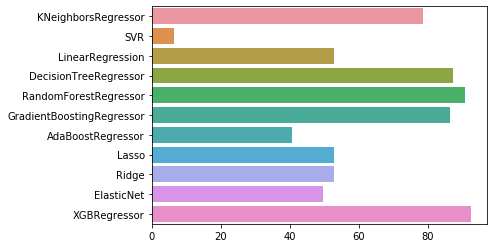

In [58]:
# visualisation of R2 Score
sns.barplot(y=Model,x=R2_score)

## Hyper Parameter Tuning

##### I have found the best r2 score and now I'm finding best parameters for respective models....

In [59]:
#...........Function of GridSearch to find best parameters and print them ........
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters):
    clf = GridSearchCV(estimator=mod,
                       param_grid=parameters,
                       scoring='r2' ,
                       cv=5,verbose=2,
                       n_jobs=-1)
    
    clf.fit(x_train,y_train)
    print(clf.best_params_)

##### ==> Grid Search for RandomForestRegressor


In [60]:
#.................Grid Search for RandomForestRegressor..........
rf=RandomForestRegressor()
parameters={'n_estimators': [100, 500,700, 1000,2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
grid_cv(rf,parameters)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 10.5min finished


{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500}


In [66]:
# checking R2 score using best parameters which is calculated from gridsearchCV......
rf=RandomForestRegressor(n_estimators=500,max_depth=None, min_samples_leaf= 1, max_features= 'auto',min_samples_split=4)
max_r2_score(rf)

max r2 score corresponding to 74 is: 0.9241466255476356


74

##### ==> Grid Search for GradientBoostingRegressor

In [61]:
#.................Grid Search for GradientBoostingRegressor..........
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbr,parameters)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  37 out of  60 | elapsed:    4.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    9.2s finished


{'learning_rate': 0.1, 'n_estimators': 500}


In [67]:
#checking r2 score using best parameters which calculated from gridsearchCV
gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators= 500)
max_r2_score(gbr)

max r2 score corresponding to 93 is: 0.9073433923534648


93

##### ==> Grid Search for XGBRegressor

In [62]:
#.................Grid Search for XGBRegressor..........
from xgboost import XGBRegressor
xgb= XGBRegressor()
parameters= {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
              "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
              "min_child_weight" : [ 1, 3, 5, 7 ],
              "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
         }
grid_cv(xgb,parameters)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

{'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 10, 'min_child_weight': 3}


In [64]:
#checking r2 score using best parameters which calculated from gridsearchCV
xgb=XGBRegressor(colsample_bytree= 0.7, gamma= 0.0, learning_rate= 0.15, max_depth= 10, min_child_weight= 3)
max_r2_score(xgb)

max r2 score corresponding to 93 is: 0.932331469352276


93

##### ==> Grid Search for LGBMRegressor

In [63]:
#.................Grid Search for LGBMRegressor..........
import lightgbm as lgb
lg = lgb.LGBMRegressor(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="r2")
grid_search.fit(x,y)
grid_search.best_estimator_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=50,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=900, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [65]:
#checking r2 score using best parameters and scores which calculated from gridsearchCV
import lightgbm as lgb
lgbr=lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=50,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=900, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
max_r2_score(lgbr)

max r2 score corresponding to 97 is: 0.9217730036095523


97

## Conclusion:                      

1) Jet Airways are preferred over others by passengers for travelling.                   
2) Maximum Journeys are taken place on 6th December,2019                    
3) Number of counts of Flights Where Destination is Cochin are more.                   
4) Number of counts of Flights where source is Delhi is more.              
5) Number of counts of Flights having only 1 stop are more.                     
6) Most number of flights are during Morning slot.              
7) During Weekdays more number of flights runs.              
8) Thursday is the most busiest day for flights.              
9) Month May have maximum number of flight counts.             
10) Delhi to cochin via Bombay are more flights.                 
11) After that flights from Banglore to Delhi are more.                 
12) More the number of stops more is the flight price.                     
13) Jet Airways Buisness have more number of flight price.                 
14) Morning flights have more price.              
15) Buisness class have more flight price.                  
16) Thursday and sunday have more flights thus price is also more.               
17) January month have costlier flights.              
18) BOM-JDH-Del-HYD and BOM-DED-DEL-HYD have highest price.             
19) Price is more in starting of the month                    
20) As Duration of the flight increases the price also increases                      

## Steps Followed:            

1) Data Analysis.                
2) EDA Analysis.                       
3) Best parameters are found using Gridsearch cv and applied to models.                
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.     
5) AUC ROC Curves are made for each model.              
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.                        
7) DecisionTreeClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.   
8) Predicted values are saved in Project_17_Flight_Price_submission.csv file.              
9) Pickle file is named with Project_17_Flight_price_submission.pkl                   